In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

from scipy.stats import norm

In [35]:
class BlackBoxFunction():
    '''A class that will hold attributes for the functions in the capstone
        Aim to have attributes such as X, y, dimensionality, length, a full df holding all data,'''
    
    def __init__(self, name):
        load_path = f"working_data/{name}_data.xlsx"
        self.data = pd.read_excel(load_path, index_col=None)
#         self.data.drop('Unnamed: 0', inplace=True, axis=1)
        self.X = self.data.drop(['Y', 'Type'], axis = 1)
        self.Y = self.data['Y']
        x_dims = self.X.shape[1]
        y_dims = 1
        self.io = (x_dims, y_dims) # dimensions
        self.length = len(self.data)
        self.name = name
    
    def add_query(self, quiery, result):
        '''query must be a list, result a nu~mber'''
        to_append = []
        for x in quiery:
            to_append.append(x)
        to_append.append(result)
        to_append.append('query')
        to_append = pd.DataFrame(to_append).T
        to_append.columns = self.data.columns
        self.data = self.data.append(to_append, ignore_index=True)
        self.X = self.data.drop(['Y', 'Type'], axis = 1)
        self.Y = self.data['Y']


        
    def export_data_excel(self):
        export_name = f"working_data/{self.name}_data.xlsx"
        self.data.to_excel(export_name, index=False)
    
    def backup_data(self, date, week, backup_number):
        backup_folder = f"data_backups/{date}_Week{week}_backup{backup_number}"
        backup_path = f"{backup_folder}/{self.name}_data.xlsx"
        self.data.to_excel(backup_path)
    

    
    
    
    
    
    
def import_weekly_queries_results(query_number):
    '''loads the weekly queries and observations into data types readable by my code
    returns 1) queries (list of lists) and 2) observations (list)'''
    
    # initializing lists
    queries_import = []
    results_import = []
    master_list = []
    working_list = []
    
    
    # First load the queries and manipulate to make it readible then convert to float
    load_path = f"queries/{query_number}/queries.txt"
    with open(load_path) as myfile:
        queries_import = myfile.read()
    x = queries_import.replace(' ','').replace('(','').replace(')','').replace('array','').replace('[[','[').replace(']]',']').split('],')
    y = [i.strip().replace('[','').replace(']','').split(',') for i in x]
    for array in y:
        working_list = []
        for item in array:
            working_list.append(float(item))
        master_list.append(working_list)
    queries_import = master_list

    
    # Next load the observations and manipulate to make it readible then convert to float
    load_path = f"queries/{query_number}/observations.txt"
    with open(load_path) as myfile:
        results_import = myfile.read()
    master_list = []
    master_list = [float(item) for item in results_import.replace('[','').replace(']','').replace(' ','').split(',')]
    results_import = master_list
    
    return queries_import, results_import



def save_all_data():
    for function in all_bbox_functions:
        function.export_data_excel()

def backup_all_data(date, week, backup_number):
        for function in all_bbox_functions:
            function.backup_data(date, week, backup_number)

            
            
            
            

            
function_1 = BlackBoxFunction('function_1')
function_2 = BlackBoxFunction('function_2')
function_3 = BlackBoxFunction('function_3')
function_4 = BlackBoxFunction('function_4')
function_5 = BlackBoxFunction('function_5')
function_6 = BlackBoxFunction('function_6')
function_7 = BlackBoxFunction('function_7')
function_8 = BlackBoxFunction('function_8')

all_bbox_functions = [function_1, function_2, function_3, function_4, function_5, function_6, function_7, function_8]



In [3]:
# queries, results = import_weekly_queries_results(8)

In [4]:
# # ''' Loop that will add the weeks queries to the data in the function objects then save the data'''
# # ''' Only run this cell once per week.'''
# for query, result, function in zip(queries, results, all_bbox_functions):
#     function.add_query(query, result)
#     function.export_data_excel()

C:\Users\John\AppData\Local\Temp\ipykernel_24124\1134573377.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data = self.data.append(to_append, ignore_index=True)


In [5]:
def make_mesh(dimensions, lower, upper, count):
    mesh = []
    
    if dimensions == 1:
        mesh = [i for i in np.linspace(lower, upper, count)]
        
    if dimensions == 2:
        for x1 in np.linspace(lower, upper, count):
            for x2 in np.linspace(lower, upper, count):
                mesh.append([x1, x2])

    if dimensions == 3:
        for x1 in np.linspace(lower, upper, count):
            for x2 in np.linspace(lower, upper, count):
                for x3 in np.linspace(lower, upper, count):
                    mesh.append([x1, x2, x3])

    if dimensions == 4:
        for x1 in np.linspace(lower, upper, count):
            for x2 in np.linspace(lower, upper, count):
                for x3 in np.linspace(lower, upper, count):
                    for x4 in np.linspace(lower, upper, count):
                        mesh.append([x1, x2, x3, x4])
                    
    if dimensions == 5:
        for x1 in np.linspace(lower, upper, count):
            for x2 in np.linspace(lower, upper, count):
                for x3 in np.linspace(lower, upper, count):
                    for x4 in np.linspace(lower, upper, count):
                        for x5 in np.linspace(lower, upper, count):
                            mesh.append([x1, x2, x3, x4, x5])                    
                    
                    
    if dimensions == 6:
        for x1 in np.linspace(lower, upper, count):
            for x2 in np.linspace(lower, upper, count):
                for x3 in np.linspace(lower, upper, count):
                    for x4 in np.linspace(lower, upper, count):
                        for x5 in np.linspace(lower, upper, count):
                            for x6 in np.linspace(lower, upper, count):
                                mesh.append([x1, x2, x3, x4, x5, x6]) 
                                
    if dimensions == 7:
        for x1 in np.linspace(lower, upper, count):
            for x2 in np.linspace(lower, upper, count):
                for x3 in np.linspace(lower, upper, count):
                    for x4 in np.linspace(lower, upper, count):
                        for x5 in np.linspace(lower, upper, count):
                            for x6 in np.linspace(lower, upper, count):
                                for x7 in np.linspace(lower, upper, count):
                                    mesh.append([x1, x2, x3, x4, x5, x6, x7]) 
                                    
    if dimensions == 8:
        for x1 in np.linspace(lower, upper, count):
            for x2 in np.linspace(lower, upper, count):
                for x3 in np.linspace(lower, upper, count):
                    for x4 in np.linspace(lower, upper, count):
                        for x5 in np.linspace(lower, upper, count):
                            for x6 in np.linspace(lower, upper, count):
                                for x7 in np.linspace(lower, upper, count):
                                    for x8 in np.linspace(lower, upper, count):
                                        mesh.append([x1, x2, x3, x4, x5, x6, x7, x8]) 
    return mesh

In [37]:
real_noise_std = 1e-10 
noise_assumption = 1e-10
mesh_counts = {1: 1000, 2: 1000, 3: 200, 4: 50, 5: 12, 6: 10, 7: 6, 8: 6}
beta = 7
next_queries_UCB = []
next_queries_PI = []
for i, function in enumerate(all_bbox_functions):
    rbf_lengthscale = [0.01 for d in range(function.io[0])]
    print(rbf_lengthscale)
    kernel = RBF(length_scale=rbf_lengthscale, length_scale_bounds='fixed')
    model2 = GaussianProcessRegressor(kernel = kernel, alpha=noise_assumption)
    model2.fit(np.array(function.X), np.array(function.Y))
    working_mesh = make_mesh(function.io[0], 0, 0.999999, mesh_counts[function.io[0]])
    working_mesh = pd.DataFrame(working_mesh, columns = function.X.columns)
    post_mean, post_std = model2.predict(np.array(working_mesh), return_std=True)
    
    # UPPER CONFIDENCE BOUND
    UCB = post_mean + beta*post_std
    
    # PROBABILITY OF IMPROVEMENT
    PI = norm.cdf((post_mean-max(function.Y)/post_std))
    
    # idx_max
    idx_max_UCB = np.argmax(UCB)
    idx_max_PI = np.argmax(PI)
    
    next_query_UCB = working_mesh.iloc[idx_max_UCB]
    next_query_PI = working_mesh.iloc[idx_max_PI]
    next_queries_UCB.append(next_query_UCB.tolist())
    next_queries_PI.append(next_query_PI.tolist())
    
    print('Done')

[0.01, 0.01]
Done
[0.01, 0.01]
Done
[0.01, 0.01, 0.01]
Done
[0.01, 0.01, 0.01, 0.01]
Done
[0.01, 0.01, 0.01, 0.01]
Done
[0.01, 0.01, 0.01, 0.01, 0.01]
Done
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
Done
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
Done


In [43]:
print(next_queries_PI)

[[0.596596, 0.6276269999999999], [0.689689, 0.9229219999999999], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.222222, 0.222222, 0.777777, 0.333333, 0.444444, 0.111111], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1999998]]


In [44]:
# Collecting the predicitions for each acquisition function into lists
# Each list is a list of lists holding the next queries (inputs) for each function
UCB_preds = [[round(j,6) for j in i] for i in next_queries_UCB]
PI_preds = [[round(j,6) for j in i] for i in next_queries_PI]
PI_preds

[[0.596596, 0.627627],
 [0.689689, 0.922922],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.222222, 0.222222, 0.777777, 0.333333, 0.444444, 0.111111],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]]

In [39]:
# This block of code checks to see if the queries generated for each function above have been previously queried
UCB_present = []
PI_present = []

for pred_UCB, pred_PI, function in zip(UCB_preds, PI_preds, all_bbox_functions):
    UCB_present.append((function.X == np.array(pred_UCB)).all(1).any())
    PI_present.append((function.X == np.array(pred_PI)).all(1).any())
print('UCB: ', UCB_present, '\nPI:  ', PI_present)

UCB:  [False, False, False, False, True, False, False, True] 
PI:   [False, False, True, True, True, True, False, False]


In [67]:
# This block of code simply formats the queries so they can be copy/pasted into the google doc
for lst in UCB_preds:
    output = []
    for number in lst:
        num_str = str(number)
        wl = num_str.split('.')
        if len(wl[1])<6:
            wl[1] = wl[1] + '0'*(6-len(wl[1]))
            num_str = '.'.join(wl)
        output.append(num_str)
    print('-'.join(output))

0.569569-0.628628
0.679679-0.930930
0.000000-0.000000-0.170854
0.000000-0.000000-0.000000-0.204081
0.306122-0.938775-0.959183-0.877550
0.000000-0.000000-0.000000-0.000000-0.272727
0.222222-0.222222-0.777777-0.333333-0.444444-0.111111
0.200000-0.400000-0.200000-0.799999-0.599999-0.799999-0.400000-0.799999


In [68]:
function_5.data.iloc[-9:]

,X_1,X_2,X_3,X_4,Y,Type
39,0.379380,0.791682,0.221863,0.005010,2.109259,initial
40,0.630732,0.255244,0.543505,0.663668,0.890722,query
41,0.224490,0.836734,0.877550,0.877550,1035.774361,query
42,0.224490,0.857142,0.877550,0.877550,1121.132810,query
43,0.224490,0.918366,0.877550,0.877550,1441.516780,query
44,0.000000,0.000000,0.000000,0.000000,163.122500,query
45,0.226000,0.918366,0.877555,0.877555,1441.733943,query
46,0.000000,0.918366,0.877550,0.000000,486.469222,query
47,0.306122,0.938775,0.959183,0.877550,2159.806913,query


How did this whole thing evolve? Very simply at first. I didn't really know what I was doing on the ML algorithm side of things so I first wrote code to sweep through the inputs in each dimension and find the largest interval in that dimension that had not been sampled. I then cut that interval in half and sampled that point. repeat for each dimension.

Then I wrote some code that actually performed BO using a class called BlackBoxFunction that imports and holds all the data for each function, and has methods to call for the data etc. I combined this with a BO algorithm using an RBF kernel and GaussianProcessRegressor. The main thing that I found challenging was the generation of the sample space in n-dimensions. i.e. for 1D you can simply call linspace(0,0.9999, 10000) to have an extremely densely packed space from which to sample (i.e. over which to build the surrogate. I created a function called make_mesh that took in the number of dimensions and required "density" of the space in order to generate n-dimensional meshes which I could use to generate the surrogate model. I quickly learned the difficulties of expanding to higher dimensions, as my make_mesh function relied on nested for loops that had extremely poor time complexity of O(n^D). As the dimensions D increased, the function became exponentially less efficient to compute the spaces. Thus, as the functions grew in dimension I had to severly limit the density at which each dimension could be sampled. As an example, for 2D functions I can get pack each of the dimensions with 1000 points, but this had to drop to 200 points per dimension in 3D, and down to 6 (!) points per dimension in 8D. I currently still sit with this problem, that I can truly not even begin to properly explore the space! I have thought of perhaps using another function to generate these n-dimensional meshes, analagous to the MATLAB function MESHGRID or NGRID. Indeed numpy itself has a function called meshgrid that I stumbled upon when searching for the MATLAB equivalent. Unfortunately, numpy's meshgrid seemed to suffer from the same curse of dimensionality.

Initially I only calculated UCB for a couple weeks (after I built the above, ofc). Then added PI calculations as well such that I could compare the two manually to see the differences. UCB seemed to be very exploitative regardless of the value for B I gave it. Both models gave a problem that they would sometimes recommend the same points that have been previously queried! To help combat this I wrote some code to check if the new queries generated already existed in the data, such that I may know that I needed to do something to recify the issue.

To help combat the repeated queries of the same points, I went back to the bayesian optimization notebook from week 12. I ran tests on known functions and identified that the model was again converging onto the same point repeatedly after just 13 iterations. This was happening on input intervals of [0,1] but not on larger intervals. In fact, the larger the interval the more iterations it took for the model to converge. This tipped me off to the length scale of the kernel. Having a tight input domain of [0,1] means that the length scale will have a larger effect. Reducing the length scale helped allieviate my problem of seeing the same repeated queries, though the problem was still there in a big way for the PI calculations. 

- Next up I will look into the possibility of using other kernels for the GP model
- I will look deeper into the length scale to see if there are general heuristics that can help choose the scale, ideally in an automated way that will vary depending on the size of the dataset/the number of weeks/epochs that have passed. 


### I think I identified a workflow error! I would load the previous queries and data in and have it exported to excel. But for some reason, that data was not being incorporated into function.data in that process. That meant that when making the predicitions, the model was just predicting the same values as the previus week as it thought that it hadn't made that prediction yet!

### Function 5 predicted a big fish on interation 47! It will likely want to stay stuck there now since the others are so much smaller. Maybe I need to generate local meshes around optima to deter the mdoels from getting stuck in higher dimensions where I have less dense dimensions?

In [23]:
space = np.linspace(0,99,100)
xx, yy = np.meshgrid(space, space, sparse=True)
zz = xx**2 + yy**2


array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.],
       [32.],
       [33.],
       [34.],
       [35.],
       [36.],
       [37.],
       [38.],
       [39.],
       [40.],
       [41.],
       [42.],
       [43.],
       [44.],
       [45.],
       [46.],
       [47.],
       [48.],
       [49.],
       [50.],
       [51.],
       [52.],
       [53.],
       [54.],
       [55.],
       [56.],
       [57.],
       [58.],
       [59.],
       [60.],
       [61.],
       [62.],
       [63.],
       [64.],
       [65.],
       [66.],
       [67.],
       [68.],
       [69.],
       [70.],
      

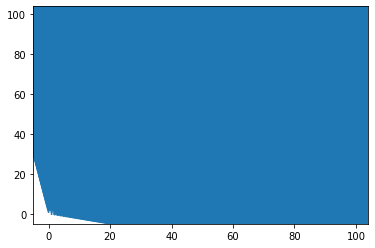

In [21]:
plt.scatter(xx, yy, zz)
plt.show()